## mv dir

In [1]:
import shutil

In [ ]:
shutil.copytree('')

# TODO:
## CLEANING THE SHIT
### > ~~label everything or start over~~ hahaha
### > ~~each section clearly marked~~
### > ~~the ability to add targets and features with one line of code~~
### > ~~standardized data input (clearly marked)~~
### > make a dot pie version of each [candels,pandas_ta,both]

In [1]:


import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_ta as pta


In [2]:
#data always goes in data
path ='data/'

#d as in directory
d = os.listdir(path)
pd.DataFrame(d,columns=['sheets'])

,sheets
0,"BATS VXX, 15.csv"


In [3]:
d

['BATS VXX, 15.csv']

# STANARD DATA LOADING 
#### `Open` `high` `low` `close` `volume` `date`

In [4]:
sheet = 0
d[sheet]

# loading data
### this part will be replaced by a data loader

df = pd.read_csv(path+d[sheet],index_col='time')
df.index = pd.to_datetime(df.index,unit='s')

df = df[['open','high','low','close','Volume']]
df['date'] = df.index.date
df


,open,high,low,close,Volume,date
time,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,2018-05-22
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2018-05-23
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,2018-05-23
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,2018-05-23
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,2018-05-23
...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,2020-10-28
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,2020-10-28
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,2020-10-28


# From Here On Data Should Look Like that
### doesnt matter if its from downloader or what
#### [datetimeindex open 	high 	low 	close 	Volume 	date] 

# Technical aylisis features

In [5]:
import ta

df = ta.add_all_ta_features(df,'open','high','low','close','Volume',fillna=True)

/home/brado/.local/lib/python3.8/site-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/home/brado/.local/lib/python3.8/site-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


# Candels features

In [6]:
df.index

DatetimeIndex(['2018-05-22 19:45:00', '2018-05-23 13:30:00',
               '2018-05-23 13:45:00', '2018-05-23 14:00:00',
               '2018-05-23 14:15:00', '2018-05-23 14:30:00',
               '2018-05-23 14:45:00', '2018-05-23 15:00:00',
               '2018-05-23 15:15:00', '2018-05-23 15:30:00',
               ...
               '2020-10-28 17:30:00', '2020-10-28 17:45:00',
               '2020-10-28 18:00:00', '2020-10-28 18:15:00',
               '2020-10-28 18:30:00', '2020-10-28 18:45:00',
               '2020-10-28 19:00:00', '2020-10-28 19:15:00',
               '2020-10-28 19:30:00', '2020-10-28 19:45:00'],
              dtype='datetime64[ns]', name='time', length=15918, freq=None)

/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/daily_close_compare.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_close'][i] = df['close'][i-1]
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/daily_close_compare.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta'][i]      = (df['close'][i]-df['last_close'][i])/df['last_close'][i]
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/daily_close_compare.py:23: SettingWithCopyWarning: 
A value is trying to be set on 

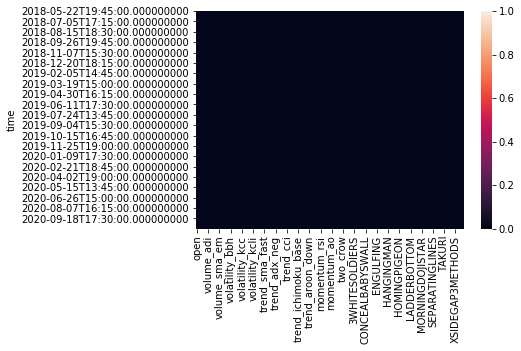

In [7]:
import candle_sticks
import daily_close_compare

# adds all the candel patterns
candle_sticks.all_candels(df)

#adds the daily_close_comparison class i made [which the day checker is not working btw]
df = daily_close_compare.create_anna(df)

#plot empty values... candel sticks dont make any nul values
sns.heatmap(df.isnull())

In [8]:
#pd.set_option('display.max_columns',None)
#df

In [9]:
print(len(df.columns))
df.head()

143


,open,high,low,close,Volume,date,volume_adi,volume_obv,volume_cmf,volume_fi,...,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.70,34.46,34.64,273953,2018-05-22,136976.500000,273953,0.500000,0.000000,...,0,0,0,0,0,0,True,None,None,False
2018-05-23 13:30:00,35.60,35.72,35.41,35.50,261600,2018-05-23,27273.274194,535553,0.050925,224976.000000,...,0,0,0,0,0,0,True,34.64,0.0248268,True
2018-05-23 13:45:00,35.54,35.75,35.50,35.59,229753,2018-05-23,-37057.565806,765306,-0.048422,195790.538571,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:00:00,35.59,35.86,35.27,35.28,302525,2018-05-23,-329327.481061,462781,-0.308408,154422.925918,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:15:00,35.27,35.50,35.27,35.46,107189,2018-05-23,-259421.611495,569970,-0.220781,135118.796501,...,0,0,0,0,0,0,False,34.64,0.0248268,True


In [10]:
print('length of dataset is:',len(df))
print('length of features is:',len(df.columns))

# you are supposed to have 5 times as many rows as columns at a minmum for ml
five_times_col = len(df.columns)*5
print('maximum features:',five_times_col)

length of dataset is: 15918
length of features is: 143
maximum features: 715


In [11]:
#standardizing data
df = df.rename(columns={'close':'Close',
               'open':'Open',
               'low':'Low',
               'high':'High',
               })
df

,Open,High,Low,Close,Volume,date,volume_adi,volume_obv,volume_cmf,volume_fi,...,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,2018-05-22,1.369765e+05,273953,0.500000,0.000000,...,0,0,0,0,0,0,True,None,None,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2018-05-23,2.727327e+04,535553,0.050925,224976.000000,...,0,0,0,0,0,0,True,34.64,0.0248268,True
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,2018-05-23,-3.705757e+04,765306,-0.048422,195790.538571,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,2018-05-23,-3.293275e+05,462781,-0.308408,154422.925918,...,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,2018-05-23,-2.594216e+05,569970,-0.220781,135118.796501,...,0,0,0,0,0,0,False,34.64,0.0248268,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,2020-10-28,-5.180311e+07,70020647,-0.023639,445.850992,...,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,2020-10-28,-5.186232e+07,70198267,-0.087741,382.157993,...,0,0,0,0,0,0,False,24.26,0.06554,True
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,2020-10-28,-5.195999e+07,70022449,-0.187377,-6956.324577,...,0,0,0,0,0,0,False,24.26,0.06554,True


In [12]:
df = df.drop('date',axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

def scale(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    sdf    = pd.DataFrame(scaled,columns = df.columns)
    sdf.index = df.index
    return sdf

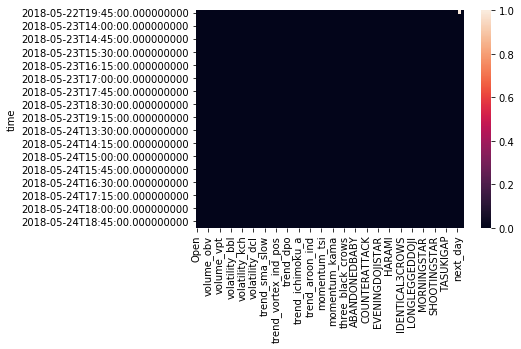

In [14]:
# if there is nulls you want them to be at the beggining 
sns.heatmap(df[:50].isnull())

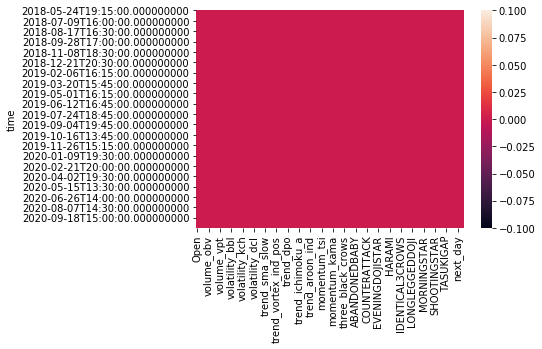

In [15]:
#if there are nulls here SOMTHING IS WRONG and yourleaking data
sns.heatmap(df[50:].isnull())

# Targets

In [16]:
import add_targets

In [17]:
#making the features data a copy so its unaffected by adding targets
fdf = df.copy()

In [18]:
#standard deviation based targets (default is .5,1,2)
tdf ,rhs,ts= add_targets.std_targs(df)
#tdf is for target_df
tdf

these ARE targets!:
 ['Close', 'STDR10:down_target:_2!', 'STDR10:down_target:_1!', 'STDR10:down_target:_0.5!', 'STDR10:up_target:_0.5!', 'STDR10:up_target:_1!', 'STDR10:up_target:_2!']


/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/add_targets.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rollingh] = df.High.rolling(hi_rol_lo).max()
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/add_targets.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[rollingl] = df.Low.rolling(hi_rol_lo).min()


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,...,STDR10:up_target:_2!,STDR10:down_target:_2!,High_ahead!,Low_ahead!,STDR10:down_target:_2_HIT!,STDR10:down_target:_1_HIT!,STDR10:down_target:_0.5_HIT!,STDR10:up_target:_0.5_HIT!,STDR10:up_target:_1_HIT!,STDR10:up_target:_2_HIT!
time,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,1.369765e+05,273953,0.500000,0.000000,50.000000,...,NaN,NaN,36.15,34.46,False,False,False,False,False,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2.727327e+04,535553,0.050925,224976.000000,100.000000,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 13:45:00,35.54,35.750,35.50,35.59,229753,-3.705757e+04,765306,-0.048422,195790.538571,100.000000,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:00:00,35.59,35.860,35.27,35.28,302525,-3.293275e+05,462781,-0.308408,154422.925918,61.963156,...,NaN,NaN,36.15,35.14,False,False,False,False,False,False
2018-05-23 14:15:00,35.27,35.500,35.27,35.46,107189,-2.594216e+05,569970,-0.220781,135118.796501,54.615124,...,NaN,NaN,36.15,35.11,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28 18:45:00,27.32,27.560,26.92,26.94,221382,-5.180311e+07,70020647,-0.023639,445.850992,40.501095,...,28.052749,26.427251,NaN,NaN,False,False,False,False,False,False
2020-10-28 19:00:00,26.92,27.140,26.84,26.94,177620,-5.186232e+07,70198267,-0.087741,382.157993,40.440372,...,27.559419,26.420581,NaN,NaN,False,False,False,False,False,False
2020-10-28 19:15:00,26.95,27.140,26.51,26.65,175818,-5.195999e+07,70022449,-0.187377,-6956.324577,41.829975,...,27.639832,26.010168,NaN,NaN,False,False,False,False,False,False


In [19]:
#adding % based targets
tdf = add_targets.add_targets(tdf)
tdf.columns

/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/add_targets.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Highlast_10!'] = df['High'].rolling(10).max()
/home/brado/algos/Falling Furry/Research/VXX/LAST_4/ML - HOLY GRAIL - V3.5 -/ML_WARPATH-V1.4/add_targets.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lowlast_10!'] = df['Low'].rolling(10).min()


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'momentum_mfi',
       ...
       'minus_5!', 'plus_5!', 'Highlast_10!', 'Lowlast_10!', 'uped_10!',
       'downed_10!', 'uped_20!', 'downed_20!', 'uped_5!', 'downed_5!'],
      dtype='object', length=171)

In [20]:
pd.set_option('display.max_columns',None)

In [21]:
tdf

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,two_crow,three_black_crows,threeinside updown,threelinestrike,3outside,3starsinsouth,3WHITESOLDIERS,ABANDONEDBABY,ADVANCEBLOCK,BELTHOLD,BREAKAWAY,CLOSINGMARUBOZU,CONCEALBABYSWALL,COUNTERATTACK,DARKCLOUDCOVER,DOJI,DOJISTAR,DRAGONFLYDOJI,ENGULFING,EVENINGDOJISTAR,EVENINGSTAR,GAPSIDESIDEWHITE,GRAVESTONEDOJI,HAMMER,HANGINGMAN,HARAMI,HARAMICROSS,HIGHWAVE,HIKKAKE,HIKKAKEMOD,HOMINGPIGEON,IDENTICAL3CROWS,INNECK,INVERTEDHAMMER,KICKING,KICKINGBYLENGTH,LADDERBOTTOM,LONGLEGGEDDOJI,LONGLINE,MARUBOZU,MATCHINGLOW,MATHOLD,MORNINGDOJISTAR,MORNINGSTAR,ONNECK,PIERCING,RICKSHAWMAN,RISEFALL3METHODS,SEPARATINGLINES,SHOOTINGSTAR,SHORTLINE,SPINNINGTOP,STALLEDPATTERN,STICKSANDWICH,TAKURI,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up,STD,STDR10:up_target:_0.5!,STDR10:down_target:_0.5!,STDR10:up_target:_1!,STDR10:down_target:_1!,STDR10:up_target:_2!,STDR10:down_target:_2!,High_ahead!,Low_ahead!,STDR10:down_target:_2_HIT!,STDR10:down_target:_1_HIT!,STDR10:down_target:_0.5_HIT!,STDR10:up_target:_0.5_HIT!,STDR10:up_target:_1_HIT!,STDR10:up_target:_2_HIT!,plus_10!,minus_10!,plus_20!,minus_20!,minus_5!,plus_5!,Highlast_10!,Lowlast_10!,uped_10!,downed_10!,uped_20!,downed_20!,uped_5!,downed_5!
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-22 19:45:00,34.59,34.700,34.46,34.64,273953,1.369765e+05,273953,0.500000,0.000000,50.000000,0.000000,0.000000,49678.722840,1000.000000,34.600000,0.000000,34.640000,34.640000,34.640000,0.000000,0.000000,0.0,0.0,34.600000,34.840000,34.360000,1.387283,0.583333,0.0,0.0,0.692841,0.750000,0.000000,0.000000,0.000000,34.640000,34.640000,34.640000,34.640000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.029231,1.000000,0.000000,-5.302051,180.723320,180.723320,0.000000,34.5800,34.5800,34.5800,34.5800,29.397783,29.487594,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,100.000000,0.000000,0.000000,75.000000,75.000000,-25.000000,0.000000,34.640000,0.000000,18.072332,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,None,None,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.15,34.46,False,False,False,False,False,False,38.1700,31.014,41.640,27.568,32.7370,36.43500,36.15,34.46,False,False,False,False,False,False
2018-05-23 13:30:00,35.60,35.720,35.41,35.50,261600,2.727327e+04,535553,0.050925,224976.000000,100.000000,116.724006,116.724006,56004.383789,1024.826790,35.060787,0.000000,35.070000,35.930000,34.210000,4.904477,0.750000,0.0,0.0,35.071667,35.346667,34.796667,1.568217,1.278788,1.0,0.0,3.592814,0.825397,0.068604,0.013721,0.054883,35.070000,35.070000,34.772308,34.703704,0.000000,0.000000,0.000000,0.195590,0.110213,0.085377,0.004849,2.046129,66.666667,-5.732051,195.380104,188.0

### It should contain nulls

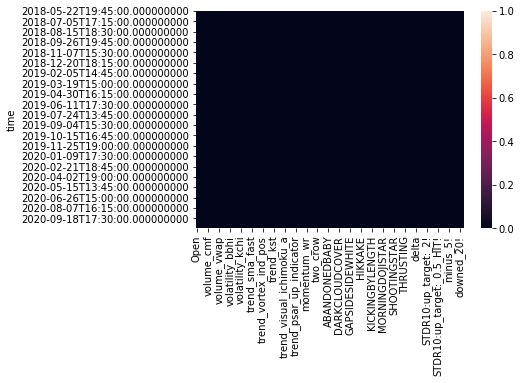

In [22]:
sns.heatmap(tdf.isnull())

### Check the first 50

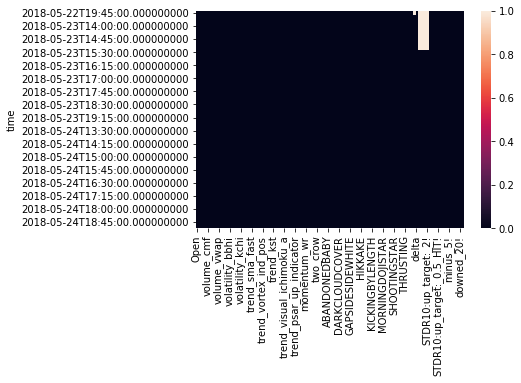

In [23]:
sns.heatmap(tdf[:50].isnull())

### Check the last 50

15900
15900


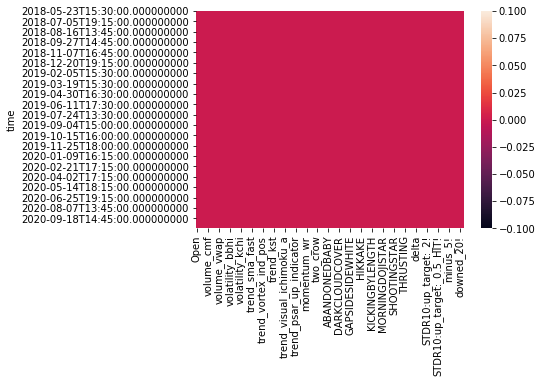

In [24]:
tdf = tdf.dropna(axis=0)
print(len(tdf))
sns.heatmap(tdf.isnull())
print(len(tdf))

In [25]:
#but now there are differnces in the legnths
print(len(tdf),len(fdf))

15900 15918


In [26]:
#so use the index as a cookie cutter template to have the exact same values
fdf = fdf.T[tdf.T.columns].T
print('target_len',len(tdf))

print( 'feature_len',len(fdf))

target_len 15900
feature_len 15900


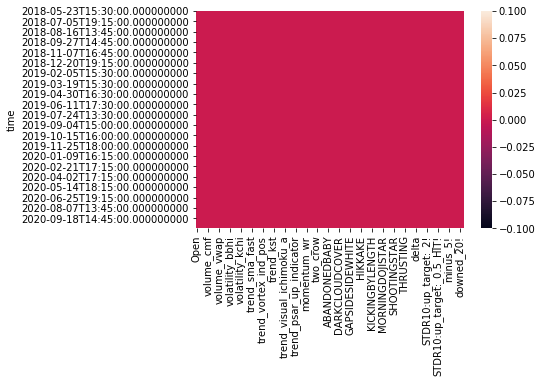

In [27]:
sns.heatmap(tdf.isnull())

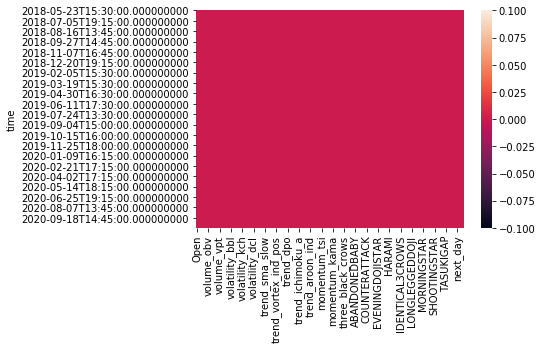

In [28]:

sns.heatmap(fdf.isnull())

# scale

In [29]:
sdf = scale(fdf)


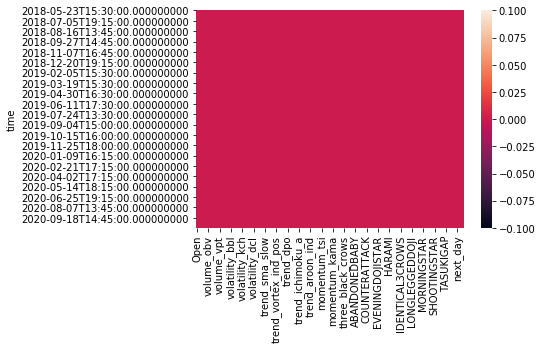

In [30]:
sns.heatmap(sdf.isnull())

# Save Clean Parsed Data

In [31]:
#create the clean data_path if it doesnt already exist
cpath = 'clean_data/'
if not os.path.exists(cpath):
    os.mkdir(cpath)

#name em
tname = 'targets_'+d[sheet]
fname = 'features_'+d[sheet]
sname = 'scaled_'+d[sheet]


#save em
tdf.to_csv(cpath+tname)
fdf.to_csv(cpath+fname)
sdf.to_csv(cpath+sname)

## what if i try to predict its favorite movin avg cross over?


# this is the candel script

# this sheet creates features and cleans data
## GOALS  of this research project 
### >anylize coeficaints on features which work best 
#### `pandas_ta` `candels` `homebrew`
### > create feature scripts that can run in shell_scripts for data downloaders

t sheet
## this should be iterable for the sheets in the dir

sheet = 0
for sheet in range(0,len(d)):
    

    # candels

    import candle_sticks
    import daily_close_compare

    df = daily_close_compare.create_anna(df)

    candle_sticks.all_candels(df)

    df = df.dropna(axis=0)
    sns.heatmap(df.isnull())

    cpath = 'clean_data/'
    if not os.path.exists(cpath):
        print('chayyyayyayya')
        os.mkdir(cpath)

    if 'date' in df.columns:
        df = df.drop('date',axis=1)

    name = d[sheet]
    name = name.split('.')[0].replace(' ','_').replace(',','') +'_candels.csv'
    name


    df.to_csv(cpath+name)

In [32]:
fdf

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,two_crow,three_black_crows,threeinside updown,threelinestrike,3outside,3starsinsouth,3WHITESOLDIERS,ABANDONEDBABY,ADVANCEBLOCK,BELTHOLD,BREAKAWAY,CLOSINGMARUBOZU,CONCEALBABYSWALL,COUNTERATTACK,DARKCLOUDCOVER,DOJI,DOJISTAR,DRAGONFLYDOJI,ENGULFING,EVENINGDOJISTAR,EVENINGSTAR,GAPSIDESIDEWHITE,GRAVESTONEDOJI,HAMMER,HANGINGMAN,HARAMI,HARAMICROSS,HIGHWAVE,HIKKAKE,HIKKAKEMOD,HOMINGPIGEON,IDENTICAL3CROWS,INNECK,INVERTEDHAMMER,KICKING,KICKINGBYLENGTH,LADDERBOTTOM,LONGLEGGEDDOJI,LONGLINE,MARUBOZU,MATCHINGLOW,MATHOLD,MORNINGDOJISTAR,MORNINGSTAR,ONNECK,PIERCING,RICKSHAWMAN,RISEFALL3METHODS,SEPARATINGLINES,SHOOTINGSTAR,SHORTLINE,SPINNINGTOP,STALLEDPATTERN,STICKSANDWICH,TAKURI,TASUKIGAP,THRUSTING,TRISTAR,UNIQUE3RIVER,UPSIDEGAP2CROWS,XSIDEGAP3METHODS,next_day,last_close,delta,delta_up
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-05-23 15:30:00,35.56,35.67,35.45,35.46,100691,-409344,522206,-0.228151,60987.8,51.216,-9.83206,12.7382,-952.27,1025.17,35.4571,0.399,35.5,36.1779,34.8221,3.81904,0.470496,0,0,35.524,35.844,35.204,1.8016,0.4,0,0,4.76056,0.591716,0.272005,0.211434,0.0605713,35.5,35.5,35.3938,35.1218,0,0,0,0.433492,0.37423,0.0592622,0.0848981,10.8706,0.814001,-6.16205,210.037,205.123,4.91426,35.71,35.305,35.5075,35.305,29.3978,29.4876,28,4,24,35.1407,-1,0,0,61.7574,94.0806,41.1226,59.1716,67.2584,-40.8284,0.192,35.6058,0,-0.309249,-0.309729,2.36721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 15:45:00,35.45,35.46,35.14,35.46,156121,-253223,678327,-0.129838,52275.3,46.4775,-53.292,6.1352,-311.386,1025.17,35.4488,0.3911,35.4964,36.1431,34.8496,3.64399,0.471887,0,0,35.5993,35.9273,35.2713,1.84273,0.287602,0,0,4.76105,0.591716,0.257136,0.220574,0.0365616,35.4964,35.4964,35.404,35.1469,0,0,0,0.419845,0.417725,0.00212043,0.0899352,11.8858,-47.3835,-6.15842,209.814,206.726,3.08787,35.645,35.305,35.475,35.305,29.3978,29.4876,28,4,24,35.1407,36.15,0,1,61.7574,92.8817,53.7372,59.1716,61.3412,-40.8284,0.138455,35.5948,0,0,0,2.36721,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,100,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,False,34.64,0.0248268,True
2018-05-23 16:00:00,35.44,35.47,35.21,35.3,134606,-294640,543721,-0.14132,41730.7,43.0464,7.72625,6.27984,-607.359,1020.55,35.4409,0.37799,35.48,36.1086,34.8514,3.54368,0.356836,0,0,35.5777,35.9007,35.2547,1.81575,0.0701754,0,0,4.76325,0.497041,0.229792,0.222418,0.00737443,35.48,35.48,35.388,35.1582,0,0,0,0.442631,0.432313,0.0103177,0.0921628,12.8738,-51.0204,-0.84,207.094,207.371,-0.277838,35.645,35.305,35.475,35.305,29.3978,29.4876,28,4,24,35.1407,36.1298,0,0,55.3638,91.321,50.2898,49.7041,56.0158,-50.2959,0.022,35.5891,0,-0.451213,-0.452234,1.90531,0,0,0,0,0,0,0,

# this sheet creates features and cleans data
## GOALS  of this research project 
### >anylize coeficaints on features which work best 
#### `pandas_ta` `candels` `homebrew`
### > create feature scripts that can run in shell_scripts for data downloaders


import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


path ='../../data/'

d = os.listdir(path)
pd.DataFrame(d,columns=['sheets'])

# selecgt sheet
## this should be iterable for the sheets in the dir

sheet = 0
d[sheet]

# loading data
### this part will be replaced by a data loader

df = pd.read_csv(path+d[sheet],index_col='time')
df.index = pd.to_datetime(df.index,unit='s')

df = df[['open','high','low','close']]
df['date'] = df.index

# candels

import candle_sticks
import daily_close_compare

df = daily_close_compare.create_anna(df)

candle_sticks.all_candels(df)

df = df.dropna(axis=0)
sns.heatmap(df.isnull())

cpath = 'clean_data/'
if not os.path.exists(cpath):
    print('chayyyayyayya')
    os.mkdir(cpath)

if 'date' in df.columns:
    df = df.drop('date',axis=1)

name = d[sheet]
name = name.split('.')[0].replace(' ','_').replace(',','') +'_candels.csv'
name


df.to_csv(cpath+name)